### Esercitazione 9

#### Problema del Commesso Viaggiatore (TSP) e ottimizzazione con Algoritmo Genetico

Il **Problema del Commesso Viaggiatore (TSP)** consiste nel trovare il percorso più breve che permetta a un viaggiatore di visitare esattamente una volta ciascuna tra $N$ città, partendo e tornando alla città iniziale. Il problema può essere espresso come la minimizzazione della seguente funzione costo:

$L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i - \vec{x}_{i+1}|$

Una possibile soluzione viene rappresentata da un vettore unidimensionale contenente permutazioni dei numeri da $1$ a $N$, che rappresentano le città nell’ordine in cui vengono visitate. 

#### Algoritmo Genetico

Per risolvere il problema è stato sviluppato un **Algoritmo Genetico (GA)**, basato sull'evoluzione di una popolazione iniziale casuale di 200 percorsi validi, ovvero i cromosomi. Le principali componenti dell’algoritmo sono:

- **Creazione della popolazione iniziale**: ciascun individuo è una permutazione valida, con la **prima città fissata**, in modo da ridurre la degenerazione del percorso minimo da 68 (ovvero 34 città da 2 diversi versi di percorrimento) a 2, uno in senso orario ed uno antiorario.
  
- **Controllo di validità**: ogni individuo viene verificato per assicurarsi che tutte le città siano presenti una sola volta e che il primo elemento sia la città $1$.

- **Funzione fitness**: Essa è la nostra funzione di costo $L^{(1)}$ del percorso. L’obiettivo è minimizzare tale quantità.


#### Selezione

La selezione degli individui genitori viene effettuata riordinando i cromosomi ponendoli in ordine crescente rispetto al loro valore di Fitness.
Il cromosoma $j$  avrà una probabilità di venire selezionato per la riproduzione data da:


$j = \text{int}(M \cdot r^p) + 1$

dove $r \in [0,1)$ è un numero casuale e $p=4$ per far si che vengano selezionati principalmente i cromosomi con un fitness migliore, ma lasciando comunque spazio ad alcuni con fitness più alto in modo da evitare di perdere possibili miglioramenti.

#### Operatori di Mutazione

Sono stati implementati diversi operatori di mutazione, ciascuno applicato con probabilità $p_m^{(i)}$ diverse a seconda del percorso in esame:

1. **Scambio di coppie**: scambia due città diverse dalla prima$.
   
2. **Shift circolare di un blocco**: sposta di $+n$ posizioni un blocco di $m$ città.

3. **Scambio tra due blocchi**: scambia due blocchi di $m$ città (diversi dalla prima).

4. **Inversione**: inverte l’ordine di un sottoblocco di $m$ città.


#### Operatore di Crossover

Successivamente è stato introdotto un operatore di **crossover** con probabilità $p_c = 80\%$, tale valore è stato utilizzato secondo il criterio di Pareto. Il funzionamento è il seguente:

1. Viene selezionata una coppia di genitori (padre e madre).
2. I percorsi vengono tagliati in un punto comune.
3. Si mantiene la prima parte del padre (o madre).
4. La seconda parte viene completata con le città mancanti, ordinate nell’ordine di apparizione nell’altro genitore.

Il procedimento viene ripetuto per $G=2000$ nuove generazioni.

#### Casi di Studio

L'algoritmo è stato applicato a tre diversi scenari:

- **34 città distribuite casualmente su una circonferenza**.
- **34 città distribuite casualmente all’interno di un quadrato**.
- **39 capitali europee** per poter vedere l' algoritmo in azione con vere città, anche se comunque stiamo supponendo che si trovino tutte alla stessa altitudine e sopprattutto che la curvatura della terra non sia rilevante.



Sono stati prodotti i grafici relativi al miglior valore di $L^{(1)}$ ad ogni nuova generazione, della media $\langle L^{(1)} \rangle$ che racchiude la media aritmetica dei 100 cromosomi con la loss minore ad ogni generazione e il grafico con il miglior percorso:



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


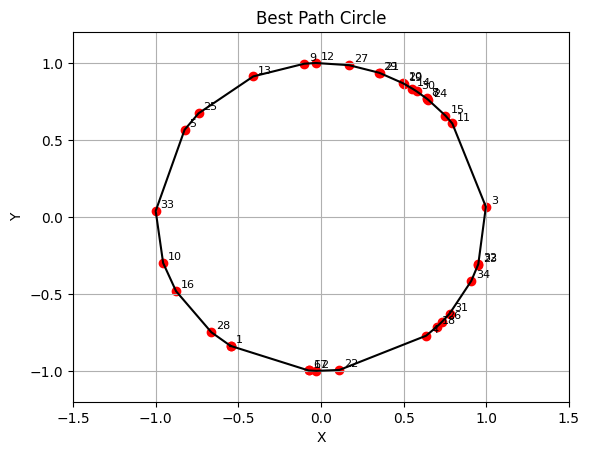

In [14]:
dati=np.loadtxt("Circle.dat",delimiter=",")
path=np.loadtxt("CirclePath.dat")
x=dati[:,0]
y=dati[:,1]
xp=[]
yp=[]
for el in path:
    xp.append(x[int(el-1)])
    yp.append(y[int(el-1)])
xp.append(xp[0])
yp.append(yp[0])
plt.scatter(x,y,color="red")
plt.plot(xp,yp,color="black")

for i, el in enumerate(path):
    plt.text(xp[i] + 0.03, yp[i] + 0.02, str(int(el)), fontsize=8, color="black")

plt.xlim(-1.5,1.5)
plt.ylim(-1.2,1.2)
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Best Path Circle")
plt.show()
plt.close()



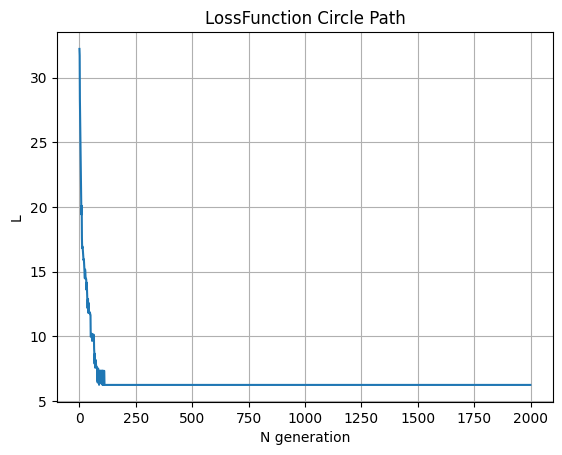

In [15]:
data=np.loadtxt("CircleLoss.dat",delimiter=",")
loss=data[:,0]
avgloss=data[:,1]

plt.plot(range(0,2000),loss)
plt.title("LossFunction Circle Path")
plt.xlabel("N generation")
plt.ylabel("L")
plt.grid()
plt.show()
plt.close()

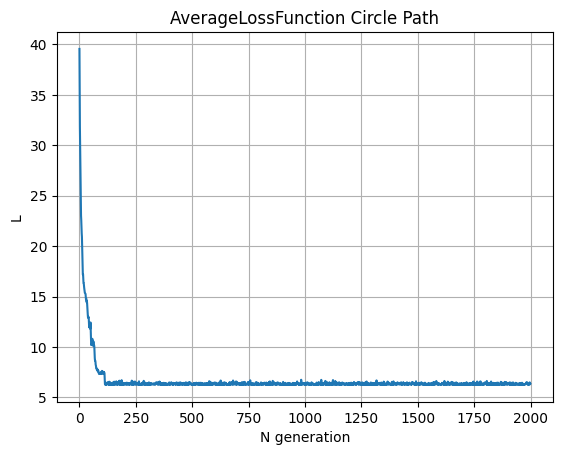

In [16]:
plt.plot(range(0,2000),avgloss)
plt.title("AverageLossFunction Circle Path")
plt.xlabel("N generation")
plt.ylabel("L")
plt.grid()
plt.show()
plt.close()

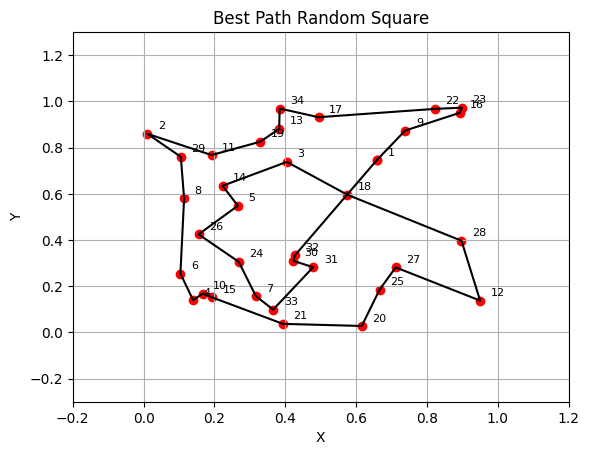

In [17]:
dati=np.loadtxt("Square.dat",delimiter=",")
path=np.loadtxt("SquarePath.dat")

x=dati[:,0]
y=dati[:,1]
xp=[]
yp=[]
for el in path:
    xp.append(x[int(el-1)])
    yp.append(y[int(el-1)])
xp.append(xp[0])
yp.append(yp[0])
plt.scatter(x,y,color="red")
plt.plot(xp,yp,color="black")
for i, el in enumerate(path):
    plt.text(xp[i] + 0.03, yp[i] + 0.02, str(int(el)), fontsize=8, color="black")

plt.xlim(-0.2,1.2)
plt.ylim(-0.3,1.3)
plt.grid()
plt.title("Best Path Random Square")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()


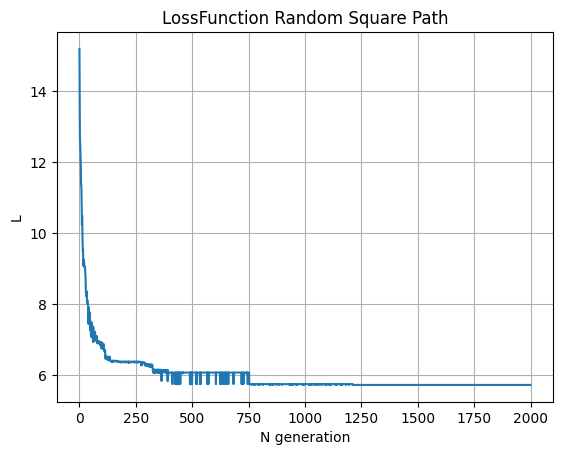

In [18]:

data=np.loadtxt("SquareLoss.dat",delimiter=",")
loss=data[:,0]
avgloss=data[:,1]

plt.plot(range(0,2000),loss)
plt.title("LossFunction Random Square Path")
plt.xlabel("N generation")
plt.ylabel("L")
plt.grid()
plt.show()
plt.close()


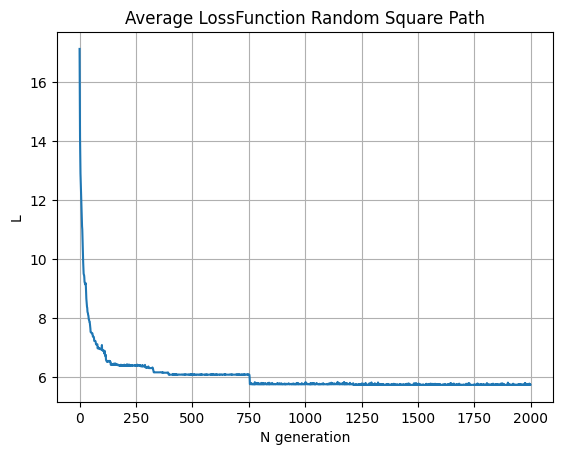

In [19]:
plt.plot(range(0,2000),avgloss)
plt.title("Average LossFunction Random Square Path")
plt.xlabel("N generation")
plt.ylabel("L")
plt.grid()
plt.show()
plt.close()

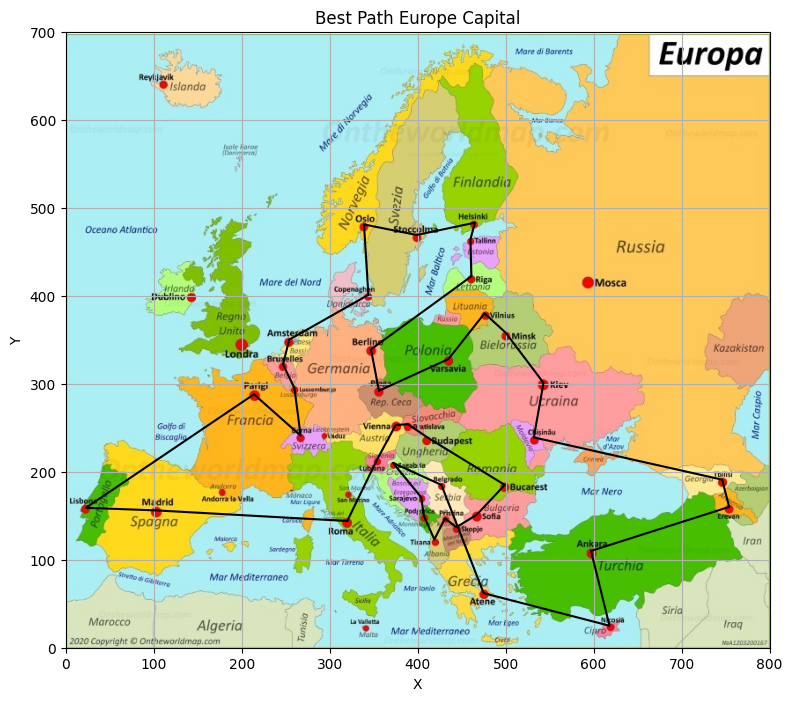

In [20]:
img_path = '../INPUT/europa.jpg'  # Cambia se il file è in un'altra cartella
img = Image.open(img_path)
width, height = img.size
dati=np.loadtxt("../INPUT/europa.dat",delimiter=" ")
path=np.loadtxt("EuropePath.dat")
x=dati[:,0]
y=dati[:,1]
xp=[]
yp=[]
for el in path:
    xp.append(x[int(el-1)])
    yp.append(y[int(el-1)])
xp.append(xp[0])
yp.append(yp[0])

# Crea la figura
plt.figure(figsize=(10, 8))
img = img.transpose(method=Image.FLIP_TOP_BOTTOM)
plt.imshow(img)
plt.plot(xp,yp,color="black")
plt.xlim(0,800)
plt.ylim(0,700)
plt.grid()
plt.title("Best Path Europe Capital")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

